<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Curso de bases para AI - Universidad de Antioquia**


El presente curso hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

\

El curso será dictado en 16 sesiones o clases de 4 horas los días sábado en las instalaciones de la universidad. Para un total de dededicación temporal de 64 horas. El curso cuenta con los siguientes módulos:

1. Bases matemáticas y de programación. (10H)
2. Bases de Python. (19H)
3. Bases de R. (13H)
4. Procesamiento de datos. (22H)

# **Ejemplo Dataset US census data**

In [134]:
library(tidyverse)
library(ggplot2)
library(dplyr)

## **Descripción del dataset:**

El presente dataset sobre el cual trabajaremos es un dataset de la universidad de califormia, el cual corresponde a un censo poblacional con el fin de predecir si una persona, segun unas características, excedía o no un salario de $50K/año. Dicho dataset tiene los siguientes atributos:


Atributo | significado | valor
--|--|--
income | ingreso | >50k, <=50k
age | edad | continua
workclass | sector | categórica
fnlwgt | peso final | continua
education | grado de educación | categórica
education-num | total de años de eduación | continua
marital-status | estado civil | categórica
occupation | ocupación | categórica
relationship | rol en familia | categórica
race | raza | categórica
sex | sexo | categórica
capital-gain | ingresos diferentes al salario | continua
capital-loss | perdidas | continua
hours-per-week | horas trabajo por semana | continua
native-country | pais de origen | categórica

**Nota:** Para mayor información, consultar [este link](https://archive.ics.uci.edu/ml/datasets/Census+Income)

## **Carga del dataset**

In [135]:
census = read.csv("https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/curso0/master/s13/adult.csv")
census

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K


## **Vista general del dataset**

In [136]:
dim(census)[1]

[1] 32561

In [137]:
dim(census)[2]

[1] 15

Procedamos a cambiar los nombres delas columnas del dataset para que no contenga puntos.

In [138]:
colnames(census) <- c("age", "workclass", "fnlwgt", 
                        "education", "education_num", 
                        "marital_status", "occupation",
                        "relationship", "race", "sex", 
                        "capital_gain", "capital_loss", 
                        "hours_per_week", "native_country", "income")
head(census,10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
5,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
6,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
7,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
8,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
9,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K


Lo primero que observamos es que en dicho dataset, los datos faltantes son identificados como `?`. Procedamos a remplazar todos los datos faltantes por `NA`

In [139]:
str(census, vec.len = 2, strict.width = "no", width = 30)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  90 82 66 54 41 ...
 $ workclass     : Factor w/ 9 levels "?","Federal-gov",..: 1 5 1 5 5 ...
 $ fnlwgt        : int  77053 132870 186061 140359 264663 ...
 $ education     : Factor w/ 16 levels "10th","11th",..: 12 12 16 6 16 ...
 $ education_num : int  9 9 10 4 10 ...
 $ marital_status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 7 7 7 1 6 ...
 $ occupation    : Factor w/ 15 levels "?","Adm-clerical",..: 1 5 1 8 11 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 2 2 5 5 4 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 3 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 ...
 $ capital_gain  : int  0 0 0 0 0 ...
 $ capital_loss  : int  4356 4356 4356 3900 3900 ...
 $ hours_per_week: int  40 18 40 40 40 ...
 $ native_country: Factor w/ 42 levels "?","Cambodia",..: 40 40 40 40 40 ...
 $ income        : Factor w/ 2 levels "<=50K",">50K": 1 1 1 

Como puede observarse, las variables de tipo `int` son:

- `age`
- `fnlwgt`
- `education_num`
- `capital_gain`
- `capital_loss`
- `hours_per_week`

Por otra parte, el resto de variables son `factors`, con diferentes número de niveles, y corresponden a

- `workclass`
- `education`
- `marital_status`
- `occupation`
- `relationship`
- `race`
- `sex`
- `native_country`
- `income`

Con el fin de observar cuáles son los niveles de cada factor, definiremos la función `label_factor()`, la cual toma como argumento el dataframe `census`, identifica las variables de tipo `factor` e imprime los niveles de cada variable categórica:

In [140]:
levels_factors <- function(mydata) {
    col_names <- names(mydata)
    for (i in 1:length(col_names)) {
        if (is.factor(mydata[, col_names[i]])) {
            message(noquote(paste("Covariate ", "*", 
                                  col_names[i], "*", 
                                  " with factor levels:", 
                                  sep = "")))
            print(levels(mydata[, col_names[i]]))
        }
    }
}

levels_factors(census)

Covariate *workclass* with factor levels:



[1] "?"                "Federal-gov"      "Local-gov"        "Never-worked"    
[5] "Private"          "Self-emp-inc"     "Self-emp-not-inc" "State-gov"       
[9] "Without-pay"     


Covariate *education* with factor levels:



 [1] "10th"         "11th"         "12th"         "1st-4th"      "5th-6th"     
 [6] "7th-8th"      "9th"          "Assoc-acdm"   "Assoc-voc"    "Bachelors"   
[11] "Doctorate"    "HS-grad"      "Masters"      "Preschool"    "Prof-school" 
[16] "Some-college"


Covariate *marital_status* with factor levels:



[1] "Divorced"              "Married-AF-spouse"     "Married-civ-spouse"   
[4] "Married-spouse-absent" "Never-married"         "Separated"            
[7] "Widowed"              


Covariate *occupation* with factor levels:



 [1] "?"                 "Adm-clerical"      "Armed-Forces"     
 [4] "Craft-repair"      "Exec-managerial"   "Farming-fishing"  
 [7] "Handlers-cleaners" "Machine-op-inspct" "Other-service"    
[10] "Priv-house-serv"   "Prof-specialty"    "Protective-serv"  
[13] "Sales"             "Tech-support"      "Transport-moving" 


Covariate *relationship* with factor levels:



[1] "Husband"        "Not-in-family"  "Other-relative" "Own-child"     
[5] "Unmarried"      "Wife"          


Covariate *race* with factor levels:



[1] "Amer-Indian-Eskimo" "Asian-Pac-Islander" "Black"             
[4] "Other"              "White"             


Covariate *sex* with factor levels:



[1] "Female" "Male"  


Covariate *native_country* with factor levels:



 [1] "?"                          "Cambodia"                  
 [3] "Canada"                     "China"                     
 [5] "Columbia"                   "Cuba"                      
 [7] "Dominican-Republic"         "Ecuador"                   
 [9] "El-Salvador"                "England"                   
[11] "France"                     "Germany"                   
[13] "Greece"                     "Guatemala"                 
[15] "Haiti"                      "Holand-Netherlands"        
[17] "Honduras"                   "Hong"                      
[19] "Hungary"                    "India"                     
[21] "Iran"                       "Ireland"                   
[23] "Italy"                      "Jamaica"                   
[25] "Japan"                      "Laos"                      
[27] "Mexico"                     "Nicaragua"                 
[29] "Outlying-US(Guam-USVI-etc)" "Peru"                      
[31] "Philippines"                "Poland"             

Covariate *income* with factor levels:



[1] "<=50K" ">50K" 


Al correr esta función, observamos que algunas variables de tipo `factor` tiene como categoría el valor `?`. De acuerdo con la información suministrada en este [link](https://archive.ics.uci.edu/ml/datasets/Census+Income), los valores faltante se indentifican como `?`.

## **Limpieza de datos faltantes**

Antes de proceder con un análisis exproratorio de datos (EDA - exploratory Data Analysis) y un análisis predictivo posterior, debemos tratar los datos faltantes. Con el fin de realizar esta tarea, cargaremos nuevamente el dataset `adult.csv`, pero especificando la opción `na.strings = "?"`, lo cual quiere decir que todos los `strings`  `?` se marcarán como `NA` (Not Available). En general, en `R`, los datos faltantes se denotn como `NA`.

In [141]:
census = read.csv("https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/curso0/master/s13/adult.csv", sep = ",", header = TRUE, na.strings = "?")
colnames(census) <- c("age", "workclass", "fnlwgt", "education", 
                        "education_num", "marital_status", "occupation",
                        "relationship", "race", "sex", "capital_gain", 
                        "capital_loss", "hours_per_week", "native_country", "income")
head(census,10)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,90,NA,77053,HS-grad,9,Widowed,NA,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,NA,186061,Some-college,10,Widowed,NA,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
5,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
6,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
7,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
8,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
9,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K


Veamos la cantidad de datos valtante por columna

In [142]:
census %>%
  select(everything()) %>% 
  summarise_all(funs(sum(is.na(.))))

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1836,0,0,0,0,1843,0,0,0,0,0,0,583,0


Procedamos ahora a eliminar los datos faltantes mediante la función `na.omit()`:

In [143]:
census <- na.omit(census)
head(census,10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
5,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
6,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
7,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
8,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
9,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
11,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
12,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K


Nótese que el indexado del dataset presenta saltos en los datos faltantes. Para eso, renumeramos las filas del dataframe.

In [144]:
row.names(census) <- 1:nrow(census)
head(census,10)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
3,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
4,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
5,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
6,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
7,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
8,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
9,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K


### **Ejercicio 1**

Realice una gráfica de boxplot para el dataset `census` de las horas por semana trabajadas en función de `factor(0)`.

**Nota**: `factor(0)` representa un vector de tipo `factor` con una longitud de 0.



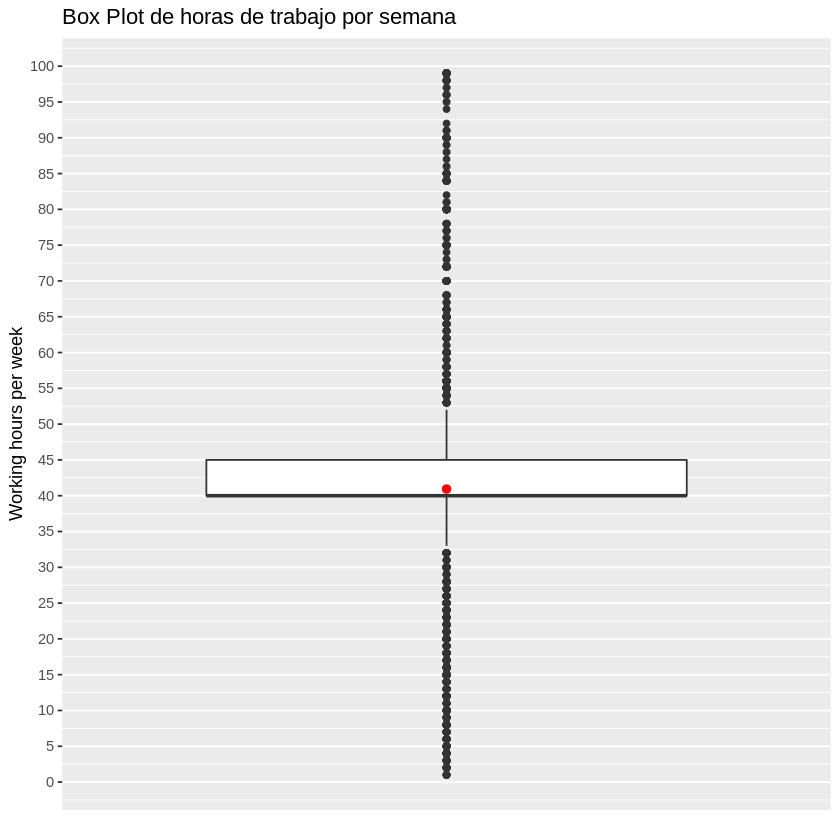

In [151]:
#@title **Solución**
ggplot(aes(x = factor(0), y = hours_per_week),
       data = census) + 
  geom_boxplot() +
  stat_summary(fun = mean, 
               geom = 'point', 
               shape = 19,
               color = "red",
               cex = 2) +
  scale_x_discrete(breaks = NULL) +
  scale_y_continuous(breaks = seq(0, 100, 5)) + 
  xlab(label = "") +
  ylab(label = "Working hours per week") +
  ggtitle("Box Plot de horas de trabajo por semana") 

### **Ejercicio 2**

Realice un histográma del `capital_gain`$>0$.

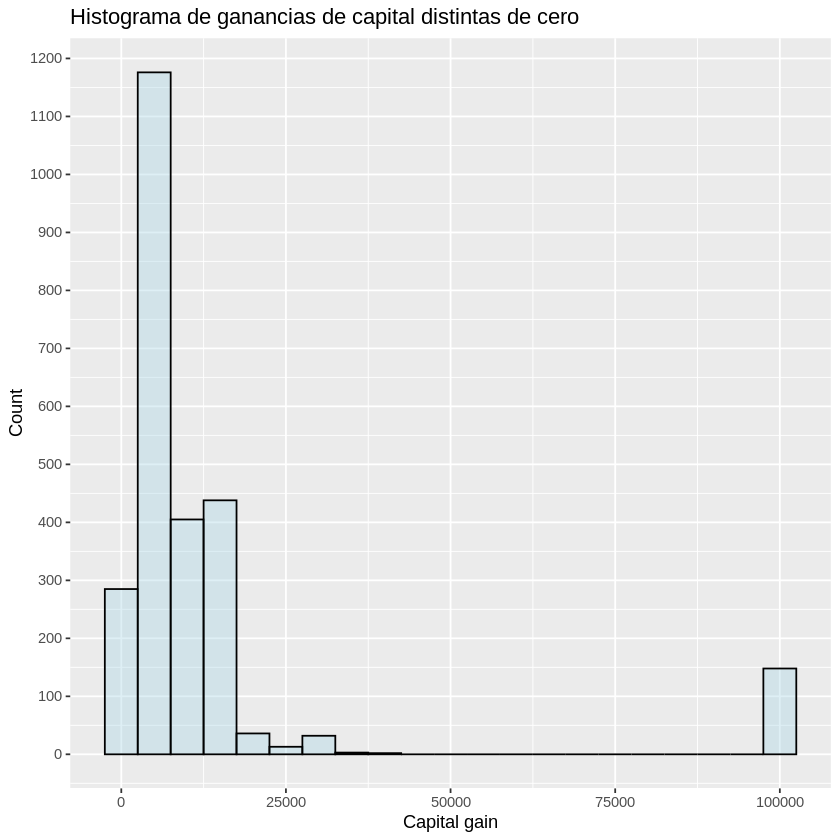

In [150]:
#@title **Solución**
df <- census[census$capital_gain > 0, ]

ggplot(data = df, 
       aes(x = df$capital_gain)) +
  geom_histogram(binwidth = 5000,
                 colour = "black",
                 fill = "lightblue",
                 alpha = 0.4) +
  scale_y_continuous(breaks = seq(0, 4000, 100)) +
  labs(x = "Capital gain", y = "Count") +
  ggtitle("Histograma de ganancias de capital distintas de cero") 

### **Ejercicio 3**

Realice una gráfica de cajas y bigotes de `capilta_loss` en función de `factor(0)`.

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


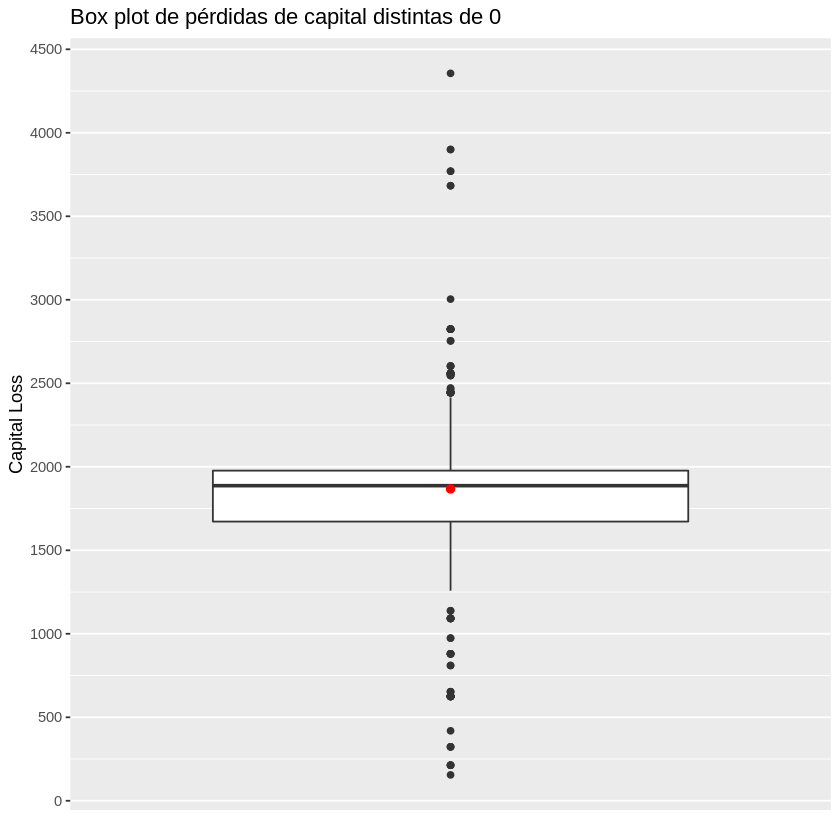

In [149]:
#@title **Solución**
ggplot(aes(x = factor(0), y = capital_loss),
       data = subset(census, census$capital_loss > 0)) + 
  geom_boxplot() +
  stat_summary(fun.y = mean, 
               geom = 'point', 
               shape = 19,
               color = "red",
               cex = 2) +
  scale_x_discrete(breaks = NULL) +
  scale_y_continuous(breaks = seq(0, 5000, 500)) +
  ylab("Capital Loss") +
  xlab("") +  
  ggtitle("Box plot de pérdidas de capital distintas de 0")

### **Ejercicio 4**

Realice un histograma de las perdidas de capital para valores mayores que 0.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



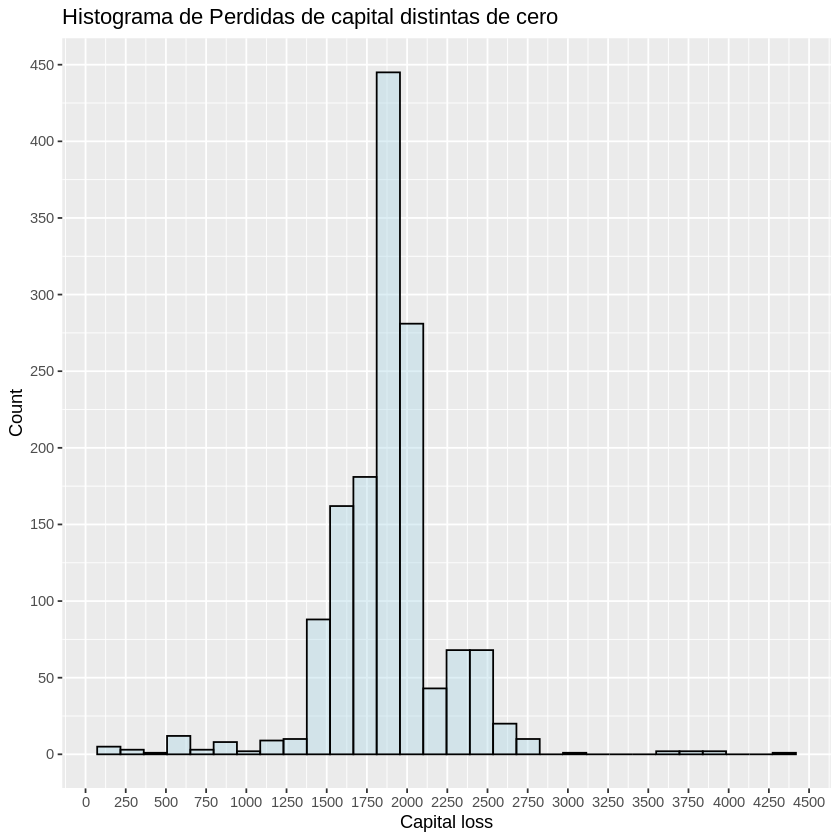

In [148]:
#@title **Solución**
df <- census[census$capital_loss > 0, ]

ggplot(data = df, 
       aes(x = df$capital_loss)) +
  geom_histogram(colour = "black",
                 fill = "lightblue",
                 alpha = 0.4) +
  scale_x_continuous(breaks = seq(0, 5000, 250)) +
  scale_y_continuous(breaks = seq(0, 450, 50)) +
  labs(x = "Capital loss", y = "Count") +
  ggtitle("Histograma de Perdidas de capital distintas de cero") 